In [40]:
import pandas as pd
import seaborn as sns

from datasets import load_dataset

#### Общий вид датасета

In [5]:
df = pd.read_csv("sensitive_topics.csv")
df.head()

,text,offline_crime,online_crime,drugs,gambling,pornography,prostitution,slavery,suicide,terrorism,weapons,body_shaming,health_shaming,politics,racism,religion,sexual_minorities,sexism,social_injustice
0,РРРРРРЯЯЯЯЯЯЯ РУССКИЕ ВАНЬКИ НИКОМУ НЕ НУЖНЫ!!...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,"По моему, быдло тот кто осуждает чужие предпоч...",0.0,0.0,0.0,0.0,1.0,0.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Бабы это вообще безхуйные сиськастые ссущие си...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,изнасиловалиа говорила что девственницаЯ так д...,0.0,0.0,0.0,0.0,1.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,"и что ? не сосут только уебищные тни, видосов ...",0.0,0.0,0.0,0.0,1.0,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [6]:
df.shape

(33303, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33303 entries, 0 to 33302
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   text               33303 non-null  object 
 1   offline_crime      33303 non-null  float64
 2   online_crime       33303 non-null  float64
 3   drugs              33303 non-null  float64
 4   gambling           33303 non-null  float64
 5   pornography        33303 non-null  float64
 6   prostitution       33303 non-null  float64
 7   slavery            33303 non-null  float64
 8   suicide            33303 non-null  float64
 9   terrorism          33303 non-null  float64
 10  weapons            33303 non-null  float64
 11  body_shaming       33303 non-null  float64
 12  health_shaming     33303 non-null  float64
 13  politics           33303 non-null  float64
 14  racism             33303 non-null  float64
 15  religion           33303 non-null  float64
 16  sexual_minorities  333

In [8]:
df.describe()

,offline_crime,online_crime,drugs,gambling,pornography,prostitution,slavery,suicide,terrorism,weapons,body_shaming,health_shaming,politics,racism,religion,sexual_minorities,sexism,social_injustice
count,33303.000000,33303.000000,33303.000000,33303.000000,33303.000000,33303.000000,33303.000000,33303.000000,33303.000000,33303.000000,33303.000000,33303.000000,33303.000000,33303.000000,33303.000000,33303.000000,33303.000000,33303.000000
mean,0.055878,0.031133,0.115660,0.061932,0.060135,0.038859,0.031684,0.042269,0.039329,0.066797,0.036467,0.051882,0.065854,0.047149,0.122281,0.058935,0.048120,0.056742
std,0.226281,0.171661,0.319472,0.240746,0.235086,0.192280,0.174787,0.200965,0.193292,0.249065,0.185813,0.220750,0.242711,0.210260,0.327354,0.233560,0.211622,0.227878
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Распределеине значений

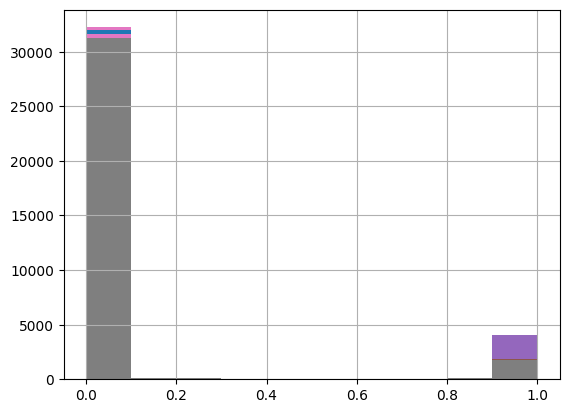

In [49]:
feats = [f for f in df.columns if f != 'text']

for f in feats:
    df[f].hist()

#### Встречаемость классов

In [77]:
df['no_hate'] = (df[feats].sum(axis = 1) == 0.0).astype(int)

In [78]:
for col in df.columns[1:]:
    display(df[col].value_counts().head())

offline_crime
0.00    31287
1.00     1737
0.19       16
0.85       14
0.80       13
Name: count, dtype: int64

online_crime
0.00    32204
1.00      983
0.75       11
0.20        9
0.46        8
Name: count, dtype: int64

drugs
0.00    29434
1.00     3822
0.85       21
0.80        6
0.18        3
Name: count, dtype: int64

gambling
0.00    31228
1.00     2051
0.85        4
0.54        3
0.30        2
Name: count, dtype: int64

pornography
0.00    31187
1.00     1874
0.85       43
0.75       21
0.25       17
Name: count, dtype: int64

prostitution
0.00    31971
1.00     1263
0.16        5
0.22        5
0.65        4
Name: count, dtype: int64

slavery
0.00    32236
1.00     1043
0.85        6
0.78        2
0.35        2
Name: count, dtype: int64

suicide
0.00    31888
1.00     1397
0.85        8
0.25        1
0.38        1
Name: count, dtype: int64

terrorism
0.00    31954
1.00     1276
0.25        7
0.85        6
0.75        6
Name: count, dtype: int64

weapons
0.00    31049
1.00     2195
0.83        4
0.85        4
0.19        4
Name: count, dtype: int64

body_shaming
0.00    32027
1.00     1168
0.85       10
0.16        6
0.23        6
Name: count, dtype: int64

health_shaming
0.00    31540
1.00     1681
0.80        8
0.85        6
0.22        6
Name: count, dtype: int64

politics
0.00    30863
1.00     1984
0.85       24
0.24       24
0.27       18
Name: count, dtype: int64

racism
0.00    31662
1.00     1498
0.85       16
0.21       10
0.84        9
Name: count, dtype: int64

religion
0.00    29218
1.00     4055
0.85        5
0.80        3
0.75        3
Name: count, dtype: int64

sexual_minorities
0.00    31265
1.00     1888
0.54        9
0.51        7
0.76        7
Name: count, dtype: int64

sexism
0.00    31587
1.00     1513
0.20       18
0.17       15
0.18       14
Name: count, dtype: int64

social_injustice
0.00    31239
1.00     1743
0.17       25
0.85       22
0.23       19
Name: count, dtype: int64

no_hate
0    30063
1     3240
Name: count, dtype: int64

#### Матрица корреляции

In [81]:
no_text_df = df[feats + ['no_hate']]

<Axes: >

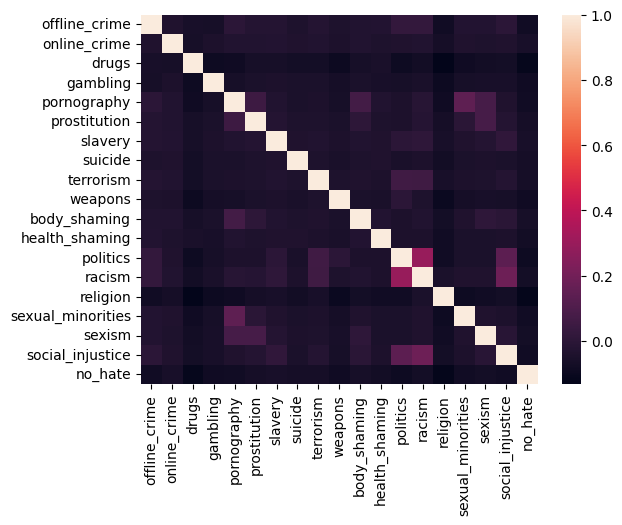

In [82]:
sns.heatmap(no_text_df.corr(method='pearson'))